# Imports

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
import torch
from torch.utils.data import DataLoader
from torch.optim import SGD
from torch.autograd import Variable
import torchvision.datasets as datasets
from torchvision import transforms

In [15]:
from network import SiameseNetwork
from utils import create_iterator, contrastive_loss_function, plot_loss, testing_plots, test_model

# Varaiables 

In [16]:
BATCH_SIZE = 64
EPOCHS = 100

In [17]:
train = datasets.MNIST(root='data/', train=True, download=True)
test = datasets.MNIST(root='data/', train=False, transform = transforms.Compose([transforms.ToTensor(),]))

In [18]:
indices = np.random.choice(len(train.targets.numpy()), 2000, replace=False)
indices_test = np.random.choice(len(test.targets.numpy()), 100, replace=False)

In [19]:
train_iter = create_iterator(train.data.numpy()[indices], train.targets.numpy()[indices], BATCH_SIZE)
test_iter = create_iterator(test.data.numpy()[indices_test], test.targets.numpy()[indices_test], BATCH_SIZE)

In [28]:
train_loader = DataLoader(train_iter, BATCH_SIZE)
test_loader = DataLoader(test, batch_size = BATCH_SIZE, shuffle = True)

In [21]:
model = SiameseNetwork()
learning_rate = 0.01 
momentum = 0.9
criterion = contrastive_loss_function
optimizer = SGD(model.parameters(), lr=learning_rate, momentum=momentum)

# Vizualizing

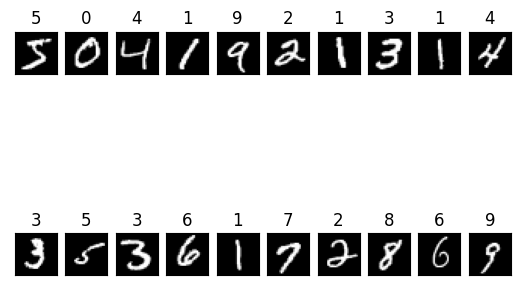

In [22]:
for i in range(20):
    x, label = train.data[i], train.targets[i]
    plt.subplot(2, 10, i+1), plt.imshow(x.numpy(), cmap = "gray")   
    plt.title(label.item())
    plt.xticks([])
    plt.yticks([])
plt.show()

# Training 

In [23]:
train_loss = [] 

for epoch in range(EPOCHS):
    print(f"Train Epoch: {epoch} --------------")
    for batch_idx, (x0, x1, labels) in enumerate(train_loader):
        labels = labels.float()
        x0, x1, labels = Variable(x0), Variable(x1), Variable(labels)
        
        output1, output2 = model(x0, x1)
        
        loss = criterion(output1, output2, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss.append(loss.item()) 
        
        if batch_idx % BATCH_SIZE == 0:
            print(f"Epoch: {epoch} \tLoss: {loss.item():.6f}")
            
torch.save(model, 'siamesenet.pth')

Train Epoch: 0 --------------
Epoch: 0 	Loss: 0.241034
Train Epoch: 1 --------------
Epoch: 1 	Loss: 0.112995
Train Epoch: 2 --------------
Epoch: 2 	Loss: 0.073561
Train Epoch: 3 --------------
Epoch: 3 	Loss: 0.053383
Train Epoch: 4 --------------
Epoch: 4 	Loss: 0.030470
Train Epoch: 5 --------------
Epoch: 5 	Loss: 0.024379
Train Epoch: 6 --------------
Epoch: 6 	Loss: 0.025945
Train Epoch: 7 --------------
Epoch: 7 	Loss: 0.022399
Train Epoch: 8 --------------
Epoch: 8 	Loss: 0.022373
Train Epoch: 9 --------------
Epoch: 9 	Loss: 0.024257
Train Epoch: 10 --------------
Epoch: 10 	Loss: 0.022954
Train Epoch: 11 --------------
Epoch: 11 	Loss: 0.021052
Train Epoch: 12 --------------
Epoch: 12 	Loss: 0.020550
Train Epoch: 13 --------------
Epoch: 13 	Loss: 0.021372
Train Epoch: 14 --------------
Epoch: 14 	Loss: 0.021777
Train Epoch: 15 --------------
Epoch: 15 	Loss: 0.020453
Train Epoch: 16 --------------
Epoch: 16 	Loss: 0.019463
Train Epoch: 17 --------------
Epoch: 17 	Loss: 0.0

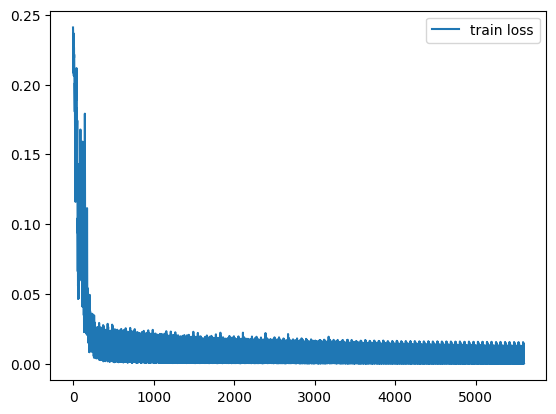

In [24]:
plot_loss(train_loss)

# Evaluation 

In [29]:
model = torch.load('siamesenet.pth')

In [30]:
all_d, all_l = test_model(model, test_loader)

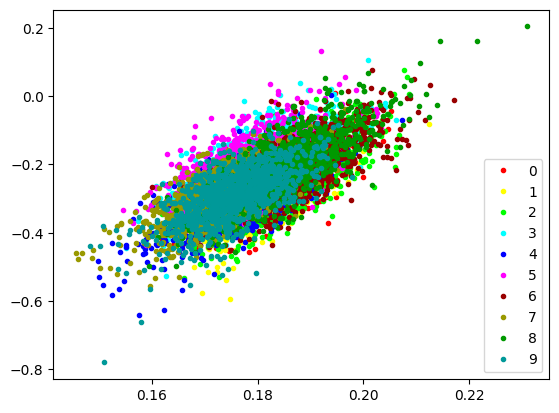

In [31]:
testing_plots(model, test_loader)